In [98]:
import pandas as pd
import plotnine as pn

In [99]:
df_at_least_six_or_at_most_two = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [100]:
df_at_least_four = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=5/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=5/epochs=4000/batch_size=3/lr=0.0001/losses.csv.'

In [ ]:
df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [ ]:
# one 'loss' df
df_curves = pd.DataFrame(
    zip(
        pd.concat([df["train_losses"], df["test_losses"]]),
        pd.concat([df["train_accuracies"], df["test_accuracies"]]),
        ["train"] * len(df) + ["test"] * len(df),
        pd.concat([df["epoch"], df["epoch"]])
    ),
    columns=["loss", "accuracy", "set", "epoch"],
    )
df_curves

,loss,accuracy,set,epoch
0,0.693162,0.492843,train,1
1,0.693154,0.503067,train,2
2,0.693172,0.449898,train,3
3,0.693161,0.503067,train,4
4,0.693155,0.503067,train,5
...,...,...,...,...
7495,0.023384,0.995261,test,3746
7496,0.023383,0.995261,test,3747
7497,0.023383,0.995261,test,3748
7498,0.067334,0.995261,test,3749


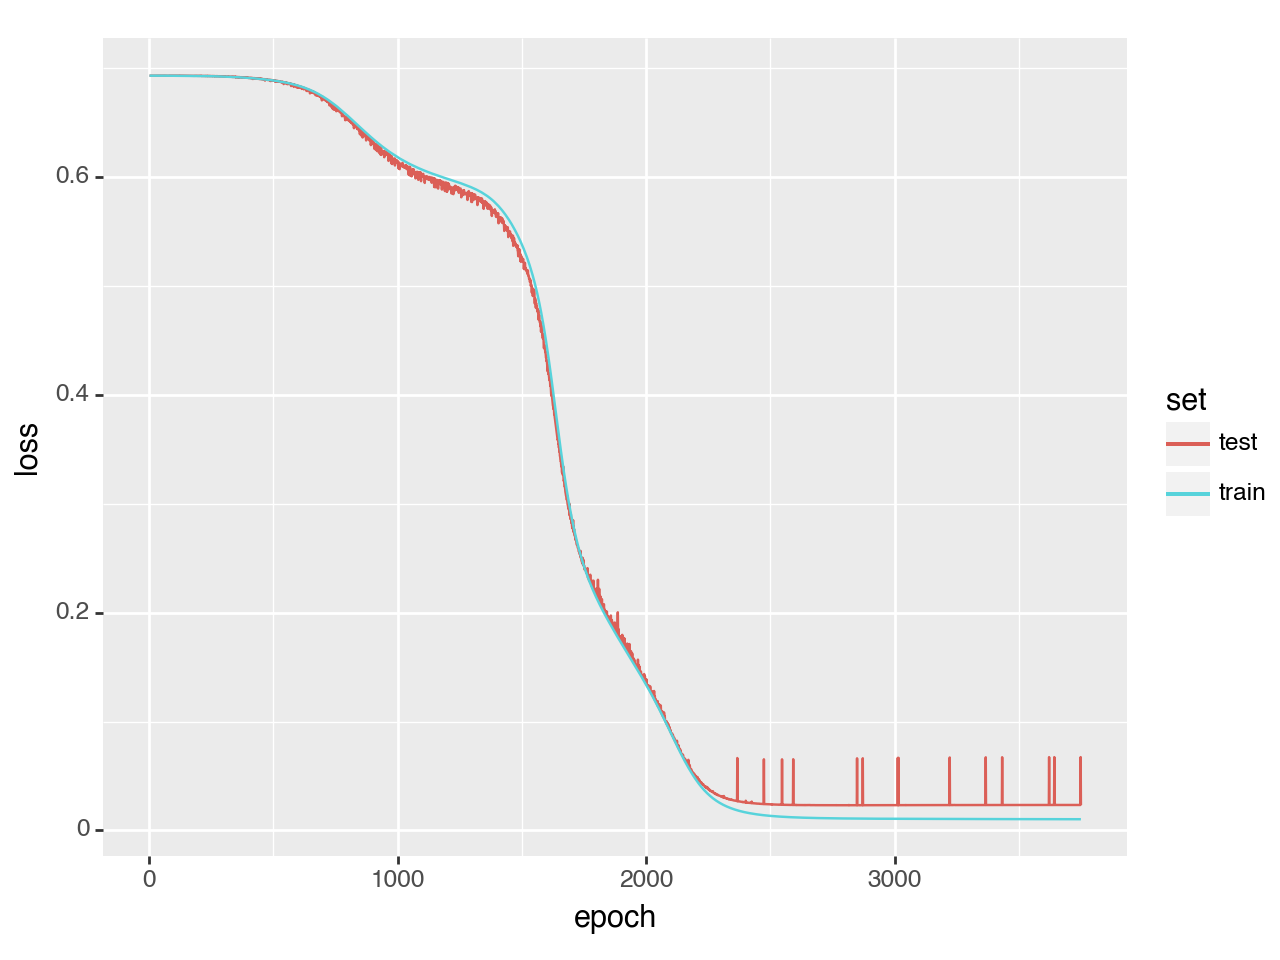

<Figure Size: (640 x 480)>

In [ ]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

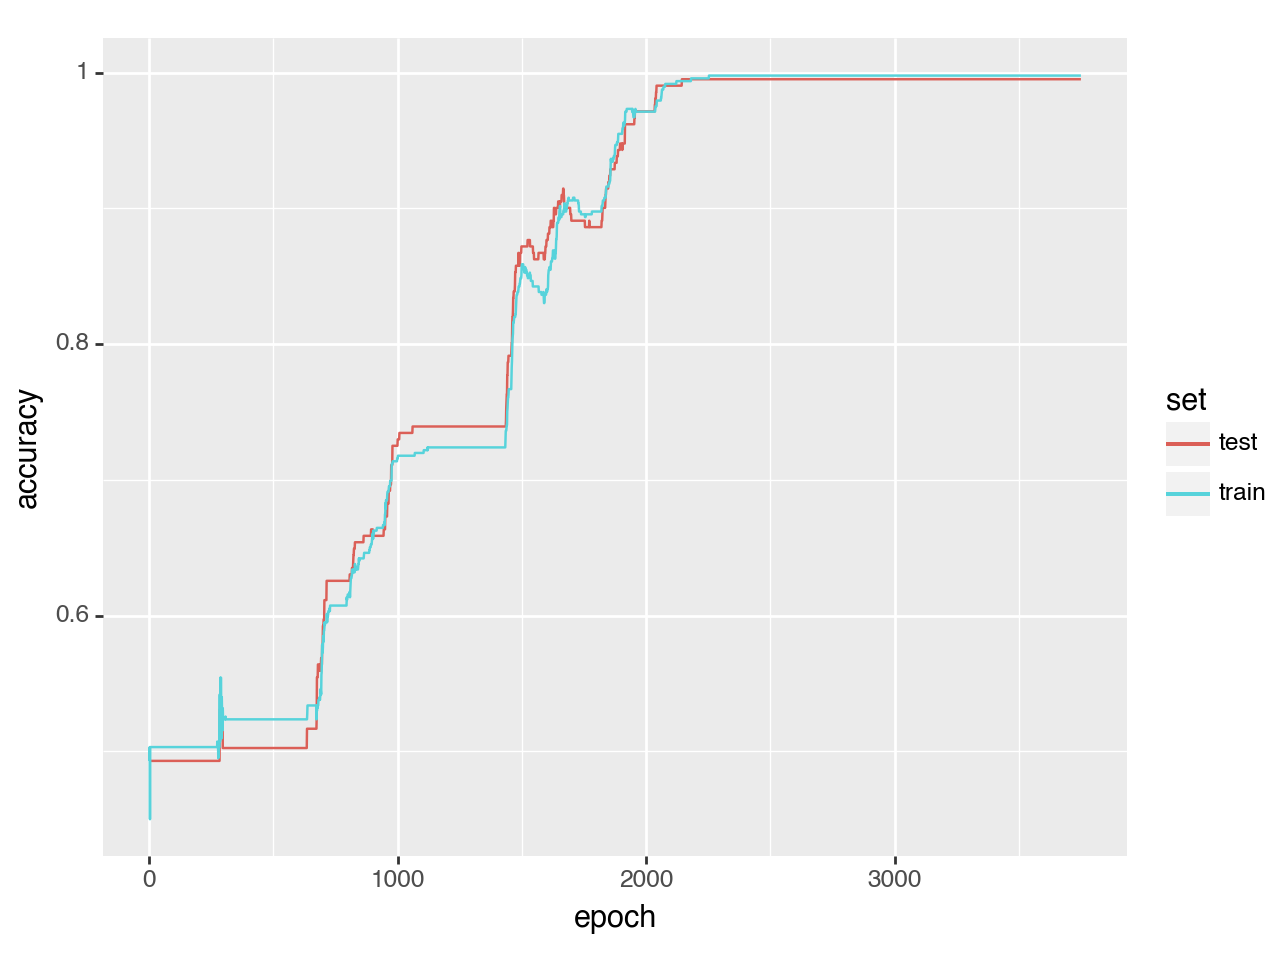

<Figure Size: (640 x 480)>

In [ ]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

In [ ]:
# combine the interesting dfs
df_at_least_six_or_at_most_two["quantifier"] = "at_least_6_or_at_most_2"
df_at_least_four["quantifier"] = "at_least_4"

df = pd.concat([df_at_least_four, df_at_least_six_or_at_most_two])
df

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier
0,0.693152,0.517691,0.693195,0.458874,1,at_least_4
1,0.693132,0.517691,0.693252,0.458874,2,at_least_4
2,0.693109,0.517691,0.693282,0.458874,3,at_least_4
3,0.693092,0.517691,0.693320,0.458874,4,at_least_4
4,0.693084,0.517691,0.693353,0.458874,5,at_least_4
...,...,...,...,...,...,...
3745,0.010297,0.997955,0.023384,0.995261,3746,at_least_6_or_at_most_2
3746,0.010296,0.997955,0.023383,0.995261,3747,at_least_6_or_at_most_2
3747,0.010296,0.997955,0.023383,0.995261,3748,at_least_6_or_at_most_2
3748,0.010296,0.997955,0.067334,0.995261,3749,at_least_6_or_at_most_2


In [ ]:
def get_curves_df(data):
    # one 'curves' df
    df_curves = pd.DataFrame(
        zip(
            pd.concat([data["train_losses"], data["test_losses"]]),
            pd.concat([data["train_accuracies"], data["test_accuracies"]]),
            ["train"] * len(data) + ["test"] * len(data),
            pd.concat([data["epoch"], data["epoch"]]),
            pd.concat([data["quantifier"], data["quantifier"]]),
        ),
        columns=["loss", "accuracy", "set", "epoch", "quantifier"],
        )
    return df_curves


df_curves = pd.concat([get_curves_df(df_at_least_four), get_curves_df(df_at_least_six_or_at_most_two)])
df_curves

,loss,accuracy,set,epoch,quantifier
0,0.693152,0.517691,train,1,at_least_4
1,0.693132,0.517691,train,2,at_least_4
2,0.693109,0.517691,train,3,at_least_4
3,0.693092,0.517691,train,4,at_least_4
4,0.693084,0.517691,train,5,at_least_4
...,...,...,...,...,...
7495,0.023384,0.995261,test,3746,at_least_6_or_at_most_2
7496,0.023383,0.995261,test,3747,at_least_6_or_at_most_2
7497,0.023383,0.995261,test,3748,at_least_6_or_at_most_2
7498,0.067334,0.995261,test,3749,at_least_6_or_at_most_2


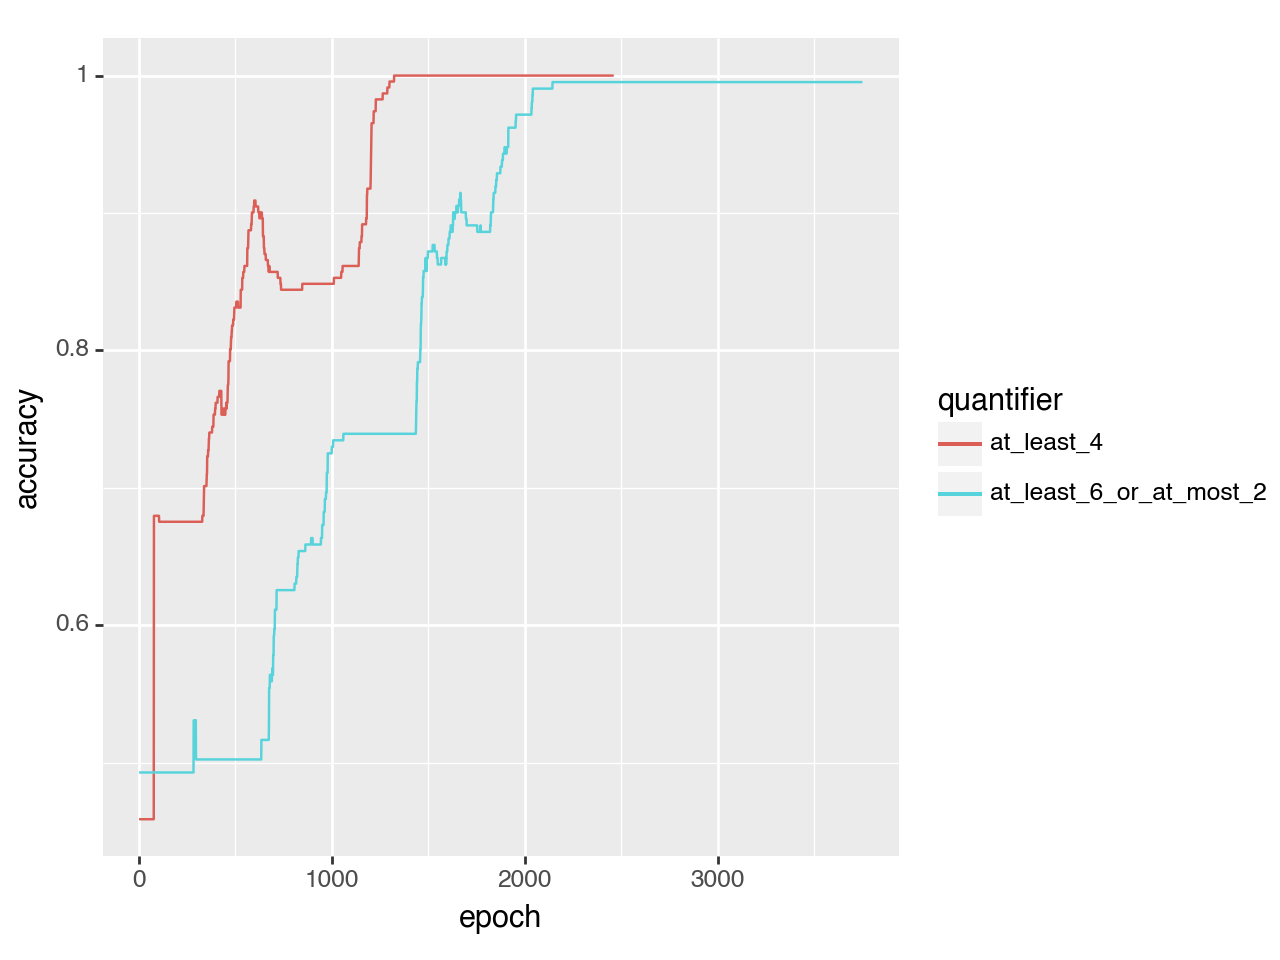

<Figure Size: (640 x 480)>

In [ ]:
(
    pn.ggplot(df_curves[df_curves["set"] == "test"], pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

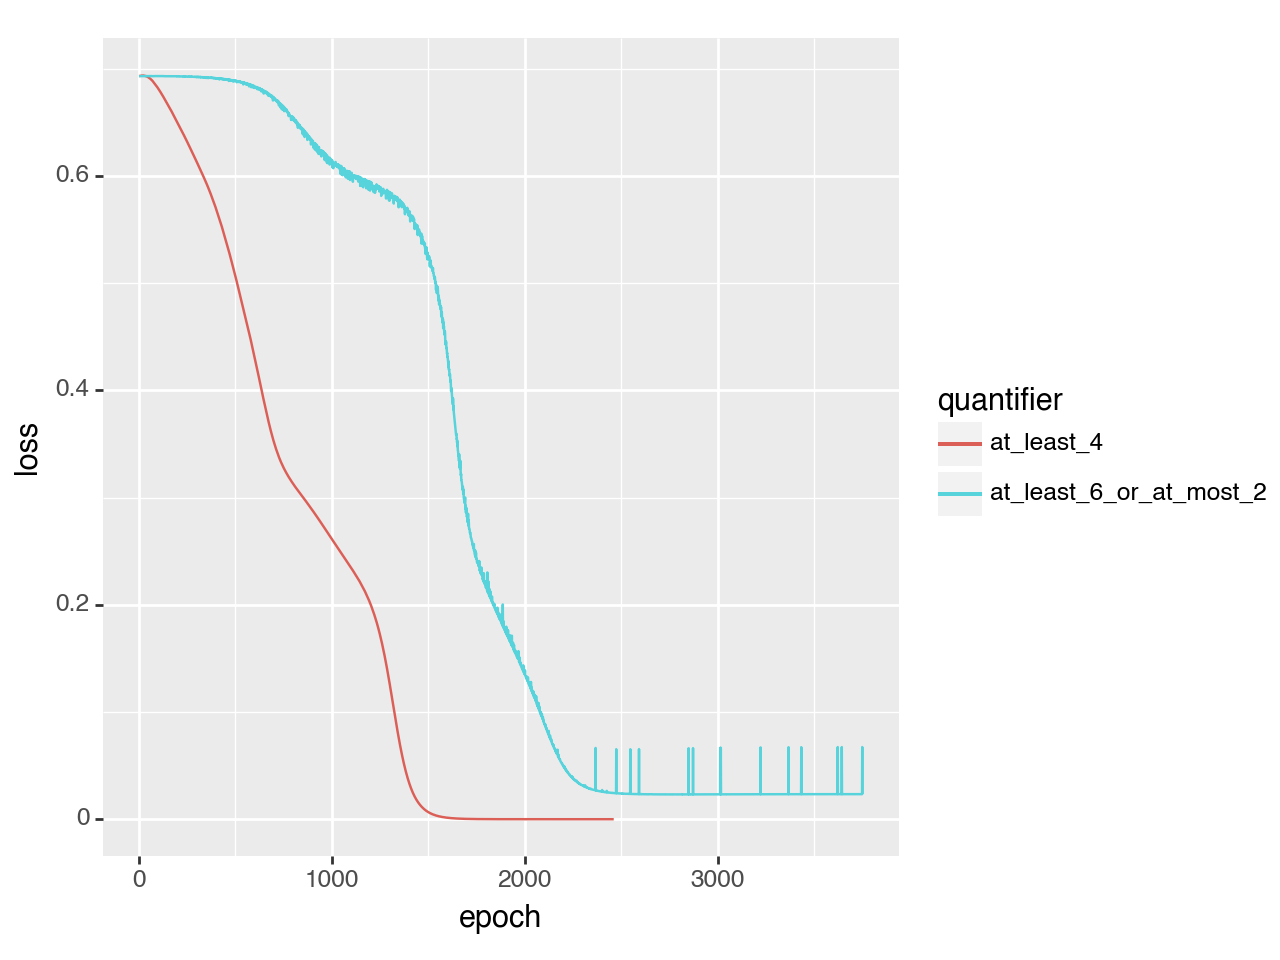

<Figure Size: (640 x 480)>

In [ ]:
(
    pn.ggplot(df_curves[df_curves["set"] == "test"], pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

In [ ]:
import torch
from qal.pfa import PFAModel

ModuleNotFoundError: No module named 'qal'

In [ ]:
model = PFAModel(2, [0,1])
model.load_state_dict(torch.load(PATH))
model.eval()